# Transfer Learning 

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [37]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

In [38]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [39]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [40]:
import glob
import os
import PIL
import time

from IPython import display

In [41]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path1 = 'Brain Tumor Data Set'
test_path1 = 'Brain Tumor Data Set'

In [42]:
# Scaling all the images between 0 to 1

train_datagen1 = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen1 = ImageDataGenerator(rescale=1./255)

In [43]:
train_set1 = train_datagen1.flow_from_directory(train_path1,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set1 = test_datagen1.flow_from_directory(test_path1,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 4600 images belonging to 2 classes.
Found 4600 images belonging to 2 classes.


# InceptionV3

In [44]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)

In [45]:
predictions = Dense(2, activation='softmax')(x2)

# this is the model we will train
models = Model(inputs=base_model.input, outputs=predictions)
models.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_423 (Conv2D)             (None, None, None, 3 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_350 (BatchN (None, None, None, 3 96          conv2d_423[0][0]                 
__________________________________________________________________________________________________
activation_313 (Activation)     (None, None, None, 3 0           batch_normalization_350[0][0]    
______________________________________________________________________________________

In [46]:
models.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = models.fit_generator(train_set1, validation_data=test_set1, epochs=20, steps_per_epoch=len(train_set1), validation_steps=len(test_set1),callbacks=[callback])

Epoch 1/20
144/144 [==============================] - 1448s 10s/step - loss: 0.2463 - accuracy: 0.9102 - val_loss: 0.9855 - val_accuracy: 0.7872
Epoch 2/20
144/144 [==============================] - 1385s 10s/step - loss: 0.1267 - accuracy: 0.9528 - val_loss: 0.1861 - val_accuracy: 0.9439
Epoch 3/20
144/144 [==============================] - 1364s 9s/step - loss: 0.0902 - accuracy: 0.9707 - val_loss: 1.3019 - val_accuracy: 0.7176
Epoch 4/20
144/144 [==============================] - 1356s 9s/step - loss: 0.0714 - accuracy: 0.9752 - val_loss: 0.1311 - val_accuracy: 0.9557
Epoch 5/20
144/144 [==============================] - 1362s 9s/step - loss: 0.0417 - accuracy: 0.9861 - val_loss: 0.1485 - val_accuracy: 0.9561
Epoch 6/20
144/144 [==============================] - 1358s 9s/step - loss: 0.0658 - accuracy: 0.9774 - val_loss: 1.2265 - val_accuracy: 0.7589
Epoch 7/20
144/144 [==============================] - 1360s 9s/step - loss: 0.0544 - accuracy: 0.9820 - val_loss: 0.0544 - val_accurac

In [67]:
models.save('inception.h5')

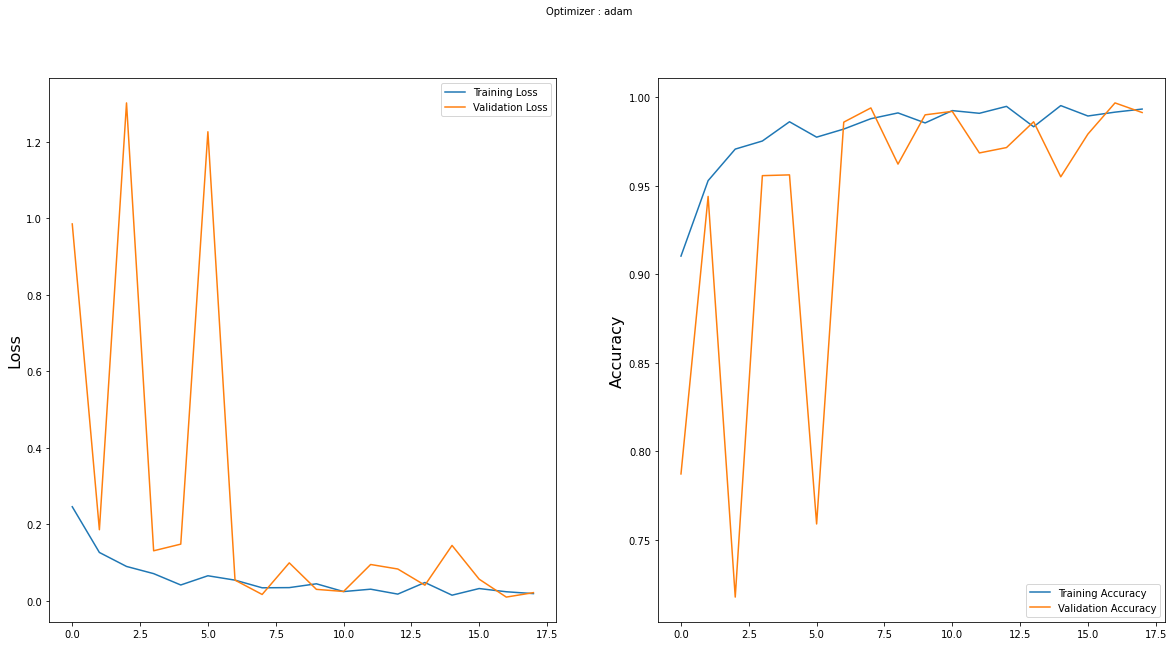

In [47]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# MobileNet

In [48]:
from tensorflow.keras.applications import MobileNet, MobileNetV2
mob = MobileNet(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [49]:
x1= Flatten()(mob.output)
prediction1 = Dense(2, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)    

In [ ]:
r1 = model12.fit_generator(train_set1, validation_data=train_set1, epochs=5, steps_per_epoch=len(train_set1), validation_steps=len(train_set1))

Epoch 1/5
144/144 [==============================] - 1061s 7s/step - loss: 1.2130 - accuracy: 0.9015 - val_loss: 0.5920 - val_accuracy: 0.9387
Epoch 2/5
144/144 [==============================] - 1054s 7s/step - loss: 0.5774 - accuracy: 0.9430 - val_loss: 13.3723 - val_accuracy: 0.7380
Epoch 3/5
144/144 [==============================] - 946s 7s/step - loss: 0.2867 - accuracy: 0.9396 - val_loss: 0.2209 - val_accuracy: 0.9541
Epoch 4/5
144/144 [==============================] - 549s 4s/step - loss: 0.0574 - accuracy: 0.9820 - val_loss: 0.0407 - val_accuracy: 0.9857
Epoch 5/5
141/144 [============================>.] - ETA: 9s - loss: 0.0241 - accuracy: 0.9907 

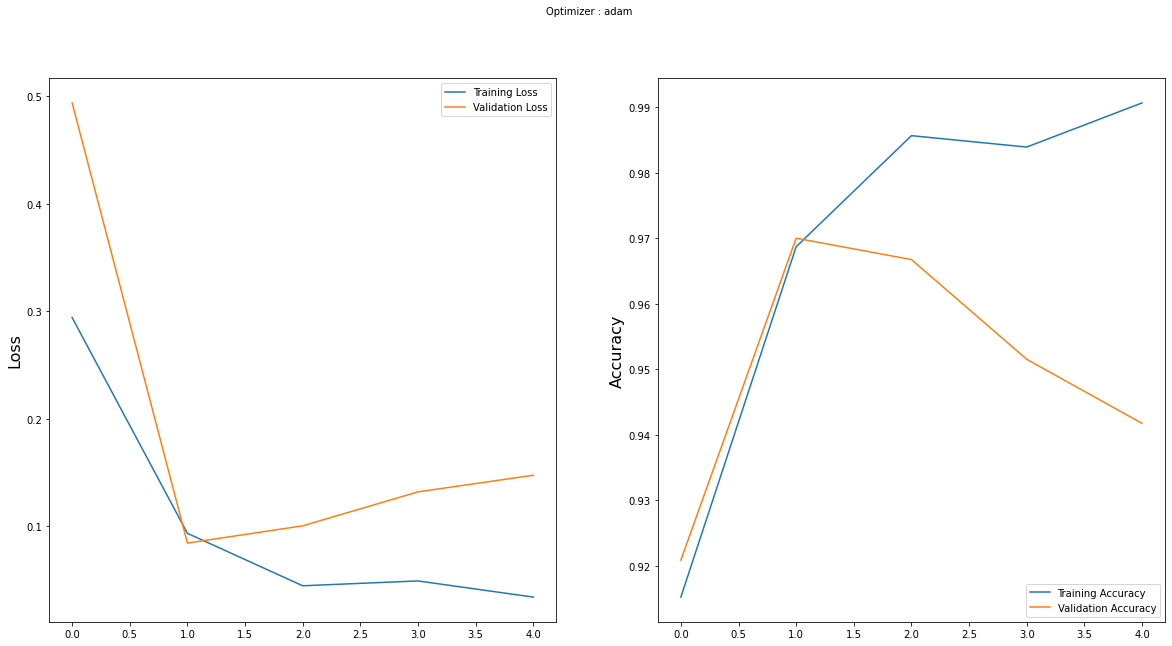

In [68]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [69]:
model12.save('mobile.h5')

# Xception

In [70]:
from tensorflow.keras.applications import Xception
mob1 = Xception(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [71]:
x1= Flatten()(mob1.output)
prediction1 = Dense(2, activation='softmax')(x1)
model121 = Model(inputs = mob1.inputs, outputs = prediction1)
model121.summary()
model121.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_12[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________

In [72]:
r1 = model121.fit_generator(train_set1, validation_data=train_set1, epochs=2, steps_per_epoch=len(train_set1), validation_steps=len(train_set1))

Epoch 1/2
144/144 [==============================] - 2289s 16s/step - loss: 0.2642 - accuracy: 0.8976 - val_loss: 0.4125 - val_accuracy: 0.9515
Epoch 2/2
144/144 [==============================] - 2157s 15s/step - loss: 0.1069 - accuracy: 0.9633 - val_loss: 0.1788 - val_accuracy: 0.9065


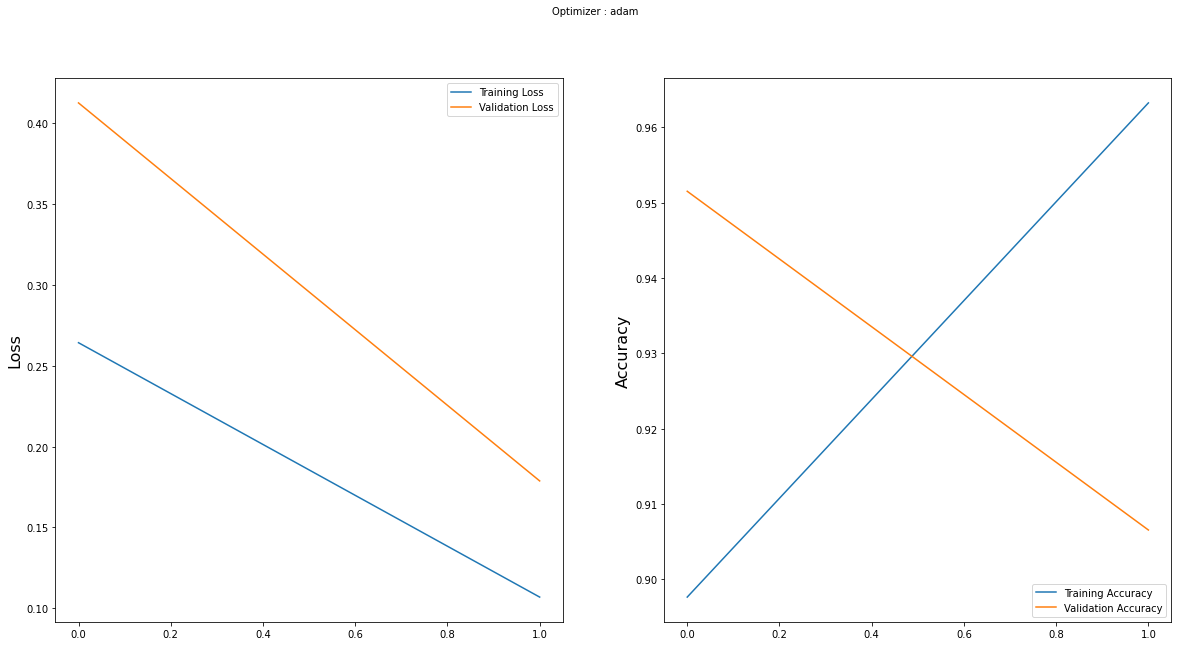

In [73]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [74]:
model121.save('xception.h5')

# EfficientNetB0

In [75]:
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [76]:
lrr= ReduceLROnPlateau(monitor='val_acc',factor=.01,patience=3,min_lr=1e-5)

In [77]:
from keras_efficientnets import EfficientNetB0
base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224,224,3),classes=2)

In [78]:
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 

#Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_21 (Functional)   (None, 7, 7, 1280)        4049564   
_________________________________________________________________
flatten_9 (Flatten)          (None, 62720)             0         
Total params: 4,049,564
Trainable params: 4,007,548
Non-trainable params: 42,016
_________________________________________________________________


In [79]:
model.add(Dense(1024,activation=('relu'),input_dim=512))

model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(2,activation=('softmax'))) 

#Checking the final model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_21 (Functional)   (None, 7, 7, 1280)        4049564   
_________________________________________________________________
flatten_9 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              64226304  
_________________________________________________________________
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 2)                

In [80]:
batch_size= 100
epochs=2
learn_rate=.001

In [81]:
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)

In [82]:
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [83]:
model.fit(train_set1, validation_data=test_set1, epochs=2)

Epoch 1/2
144/144 [==============================] - 1057s 7s/step - loss: 0.2551 - accuracy: 0.8835 - val_loss: 0.2736 - val_accuracy: 0.8900
Epoch 2/2
144/144 [==============================] - 1055s 7s/step - loss: 0.0790 - accuracy: 0.9713 - val_loss: 0.2096 - val_accuracy: 0.9237


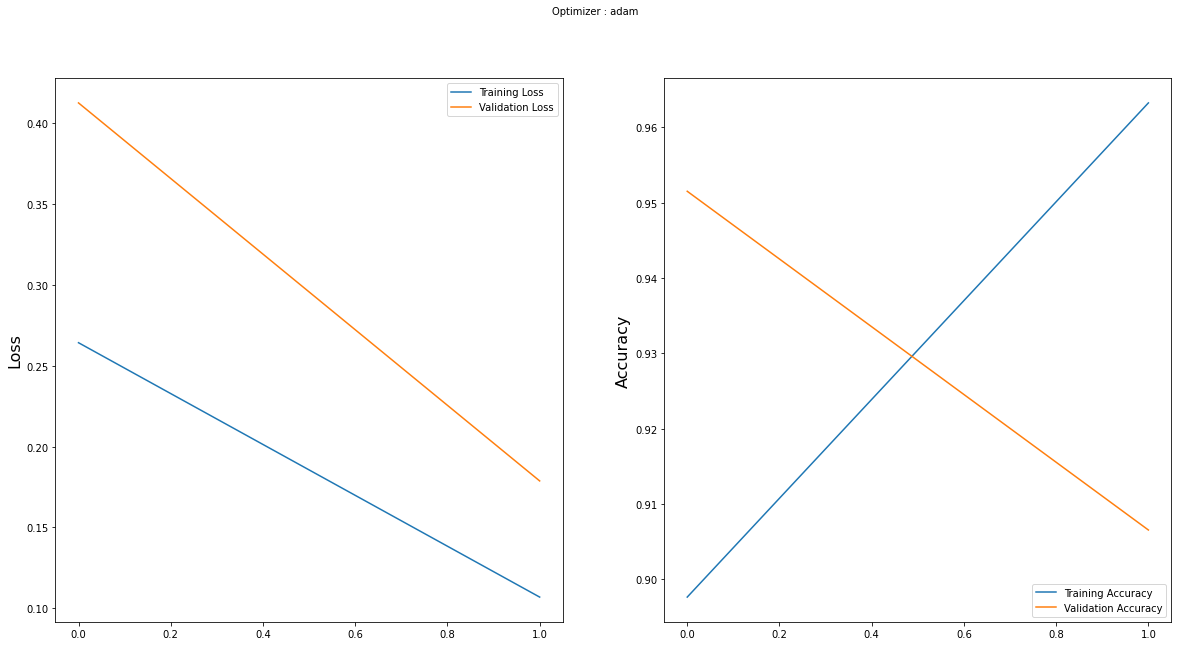

In [84]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# VGG16

In [85]:
vgg16=VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [86]:
x1= Flatten()(vgg16.output)
prediction1 = Dense(2, activation='softmax')(x1)
model1 = Model(inputs = vgg16.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [87]:
r1 = model1.fit_generator(train_set1, validation_data=test_set1, epochs=2, steps_per_epoch=20, validation_steps=20)

Epoch 1/2
20/20 [==============================] - 307s 15s/step - loss: 9.9797 - accuracy: 0.4891 - val_loss: 0.6931 - val_accuracy: 0.5516
Epoch 2/2
20/20 [==============================] - 297s 15s/step - loss: 0.6985 - accuracy: 0.4810 - val_loss: 0.6928 - val_accuracy: 0.5312


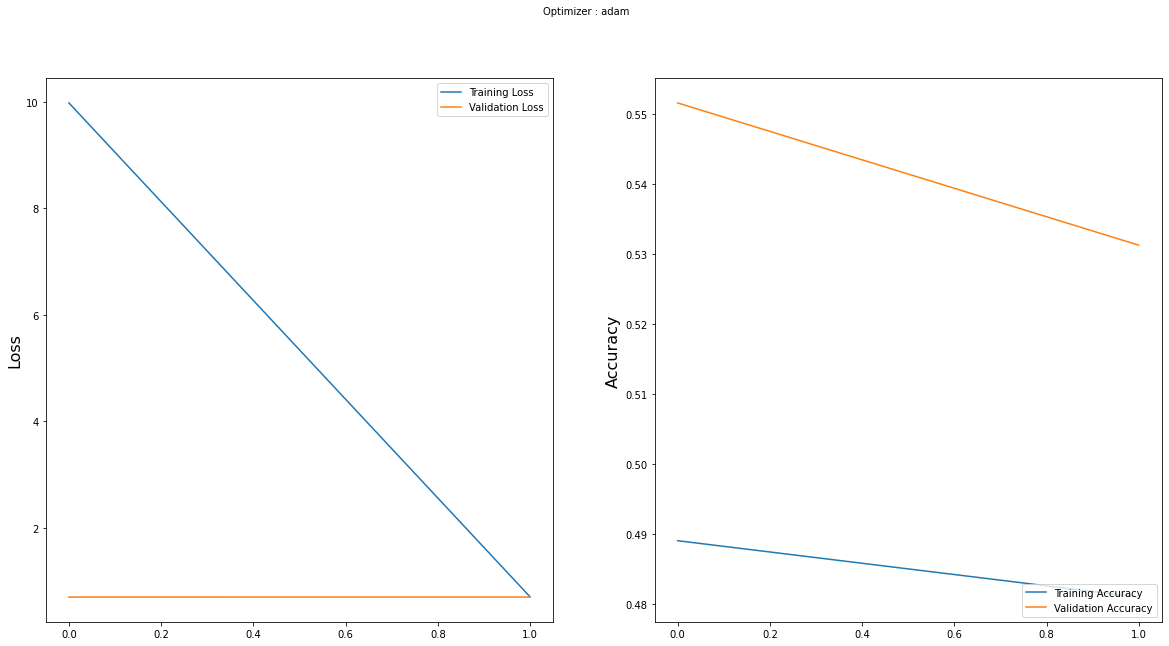

In [88]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# InceptionResNetV2

In [89]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [90]:
x3 = Flatten()(inc.output)
predictionss = Dense(2, activation='softmax')(x3)

In [91]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_655 (Conv2D)             (None, 111, 111, 32) 864         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_550 (BatchN (None, 111, 111, 32) 96          conv2d_655[0][0]                 
__________________________________________________________________________________________________
activation_439 (Activation)     (None, 111, 111, 32) 0           batch_normalization_550[0][0]    
______________________________________________________________________________________

activation_582 (Activation)     (None, 12, 12, 192)  0           batch_normalization_693[0][0]    
__________________________________________________________________________________________________
block17_17_mixed (Concatenate)  (None, 12, 12, 384)  0           activation_579[0][0]             
                                                                 activation_582[0][0]             
__________________________________________________________________________________________________
block17_17_conv (Conv2D)        (None, 12, 12, 1088) 418880      block17_17_mixed[0][0]           
__________________________________________________________________________________________________
block17_17 (Lambda)             (None, 12, 12, 1088) 0           block17_16_ac[0][0]              
                                                                 block17_17_conv[0][0]            
__________________________________________________________________________________________________
block17_17

In [92]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set1, validation_data=test_set1, epochs=2, steps_per_epoch=20, validation_steps=20)
x=r2

Epoch 1/2
20/20 [==============================] - 301s 15s/step - loss: 1.2622 - accuracy: 0.7922 - val_loss: 81514.4688 - val_accuracy: 0.4656
Epoch 2/2
20/20 [==============================] - 240s 12s/step - loss: 0.5120 - accuracy: 0.9062 - val_loss: 148802784.0000 - val_accuracy: 0.5375


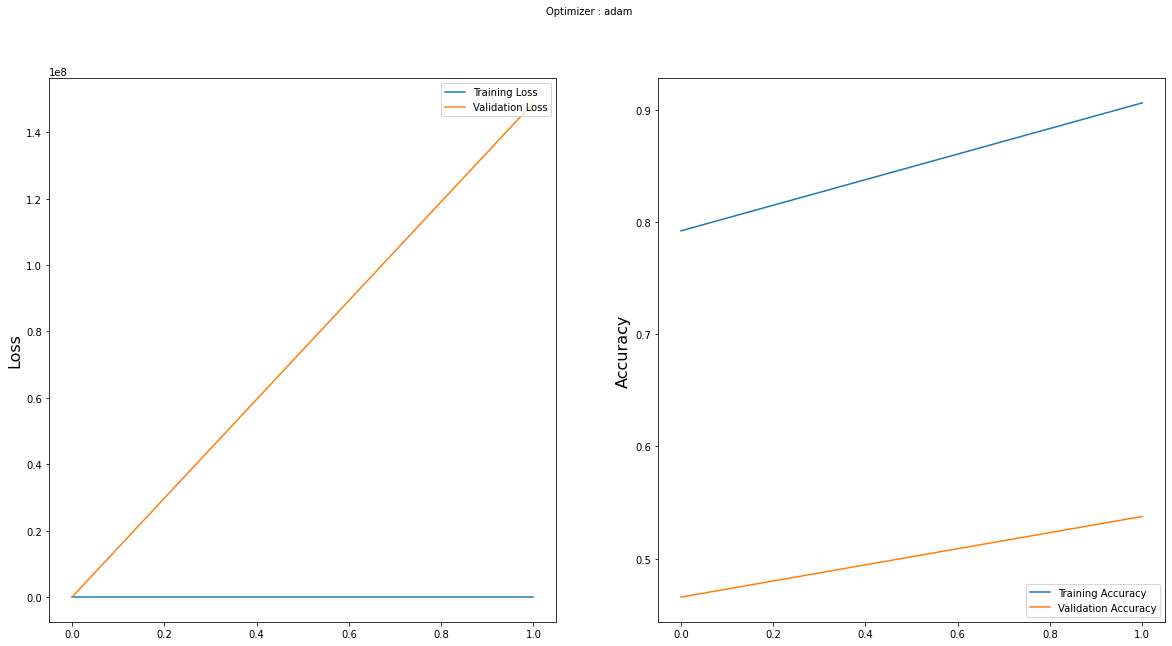

In [93]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet50

In [94]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [95]:
x = Flatten()(resnet.output)
prediction = Dense(2, activation='softmax')(x)

In [96]:
model = Model(inputs = resnet.inputs, outputs = prediction)
model.summary()

Model: "functional_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_16[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [97]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model.fit_generator(train_set1, validation_data=test_set1, epochs=2, steps_per_epoch=1, validation_steps=1,callbacks=[callback])

Epoch 1/2
1/1 [==============================] - 3s 3s/step - loss: 1.4202 - accuracy: 0.5000 - val_loss: 5.3313 - val_accuracy: 0.4375
Epoch 2/2
1/1 [==============================] - 1s 1s/step - loss: 4.8416 - accuracy: 0.6875 - val_loss: 6.9262 - val_accuracy: 0.5625


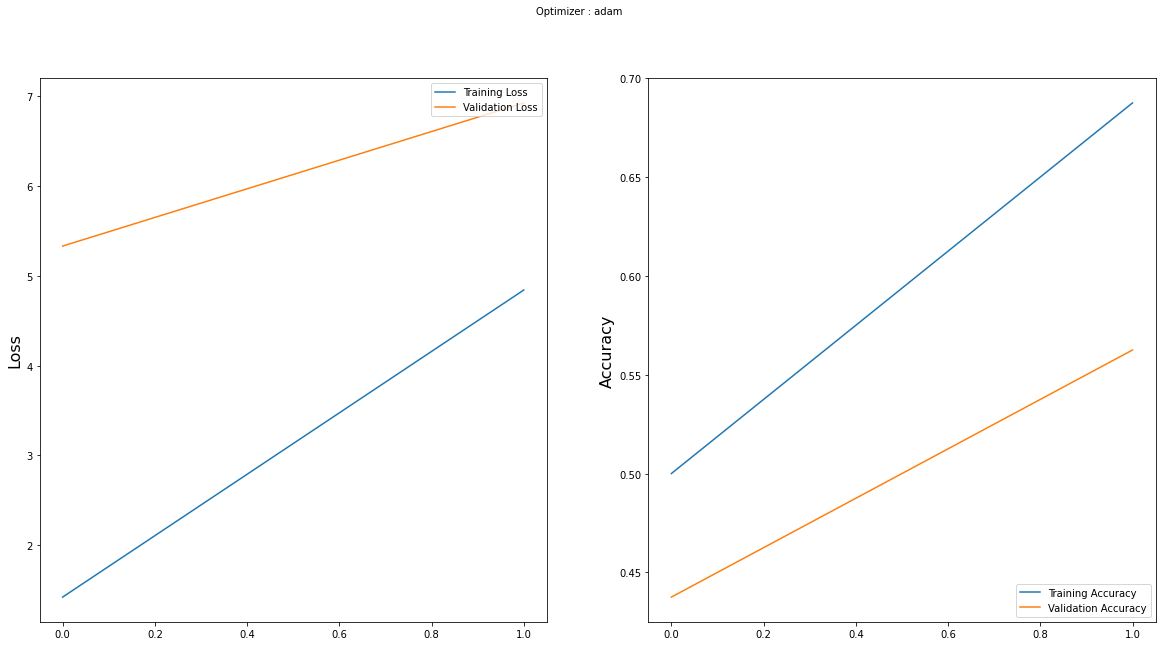

In [98]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# GoogleNet

In [99]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

In [100]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer


In [101]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(2, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X], name = 'GoogLeNet')

  return model


In [102]:
model = GoogLeNet()
model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_858 (Conv2D)             (None, 109, 109, 64) 9472        input_17[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_29 (MaxPooling2D) (None, 54, 54, 64)   0           conv2d_858[0][0]                 
__________________________________________________________________________________________________
conv2d_859 (Conv2D)             (None, 54, 54, 64)   4160        max_pooling2d_29[0][0]           
__________________________________________________________________________________________

In [103]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [104]:
r1 = model.fit(train_set1, validation_data=train_set1, epochs=2, steps_per_epoch=len(train_set1), validation_steps=len(train_set1))

Epoch 1/2
144/144 [==============================] - 331s 2s/step - loss: 0.6994 - accuracy: 0.5446 - val_loss: 0.6890 - val_accuracy: 0.5463
Epoch 2/2
144/144 [==============================] - 327s 2s/step - loss: 0.6901 - accuracy: 0.5433 - val_loss: 0.6892 - val_accuracy: 0.5463


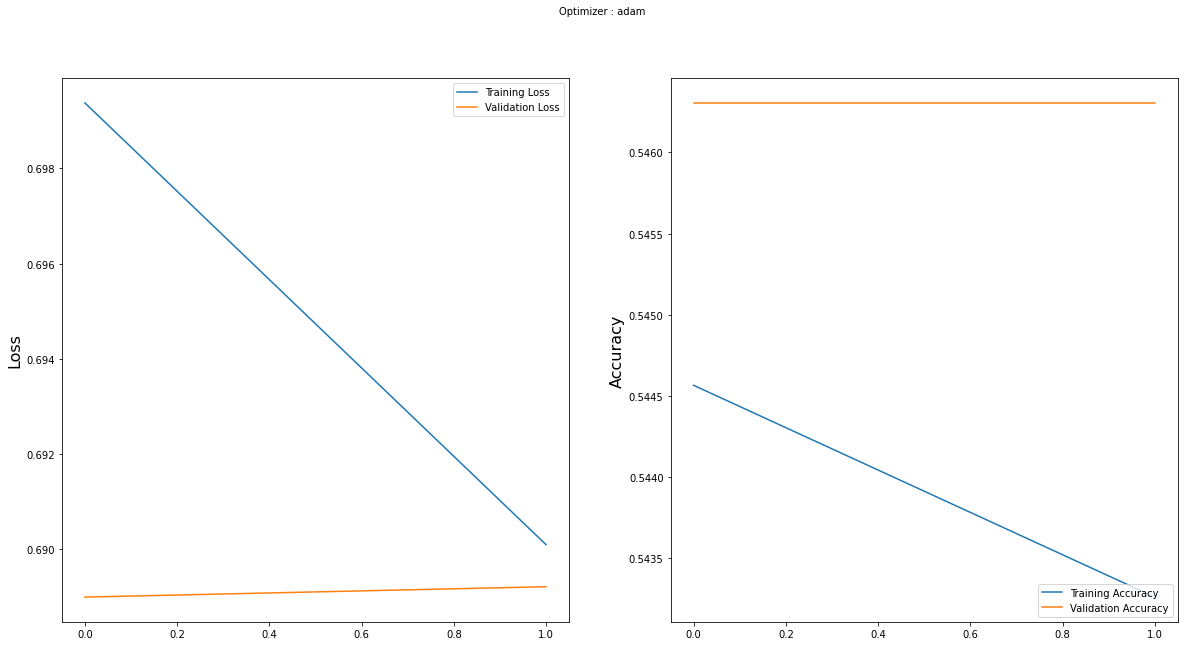

In [105]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Ensemble Model

In [106]:
# load efficientnet 
from keras.models import load_model
from keras.layers import Dense, Activation, Average
import efficientnet.keras 
def ensemble(): 
    model_1 = load_model("inception.h5")
    model_1 = Model(inputs = model_1.inputs, outputs = model_1.outputs, name = 'Inception') 
    model_2 = load_model("mobile.h5") 
    model_2 = Model(inputs = model_2.inputs, outputs = model_2.outputs, name = 'Mobile') 
    models = [model_1, model_2] 
    models_input = Input(shape =(224,224,3)) 
    models_output = [model(models_input) for model in models] 
    ensemble_output = Average()(models_output) 
    simple_average = Model(inputs = models_input, outputs = ensemble_output, name = 'Ensemble') 
    return simple_average

In [107]:
model = ensemble()
model.summary()

Model: "Ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Inception (Functional)          (None, 2)            21806882    input_18[0][0]                   
__________________________________________________________________________________________________
Mobile (Functional)             (None, 2)            3329218     input_18[0][0]                   
__________________________________________________________________________________________________
average (Average)               (None, 2)            0           Inception[0][0]                  
                                                                 Mobile[0][0]              

Epoch 1/5
144/144 [==============================] - 1517s 11s/step - loss: 0.1476 - accuracy: 0.8713 - val_loss: 1.1071 - val_accuracy: 0.7037
Epoch 2/5
144/144 [==============================] - 1355s 9s/step - loss: 0.2104 - accuracy: 0.7702 - val_loss: 0.2182 - val_accuracy: 0.7346
Epoch 3/5
144/144 [==============================] - 1352s 9s/step - loss: 0.2348 - accuracy: 0.7135 - val_loss: 0.2751 - val_accuracy: 0.6580
Epoch 4/5
144/144 [==============================] - 1416s 10s/step - loss: 0.2683 - accuracy: 0.6524 - val_loss: 0.2606 - val_accuracy: 0.7189
Epoch 5/5
144/144 [==============================] - 1386s 10s/step - loss: 0.2524 - accuracy: 0.7098 - val_loss: 0.2411 - val_accuracy: 0.7074


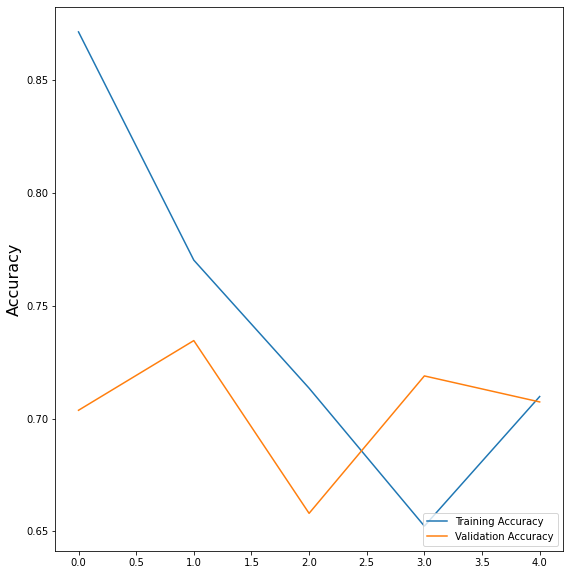

In [108]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
hist = model.fit(train_set1, validation_data=test_set1, epochs=5)

import matplotlib.pyplot as plt

x = hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()